# day06: Gradient Descent for Linear Regression

# Objectives

* Learn how to fit weight parameters of Linear Regression to a simple dataset via gradient descent
* Understand impact of step size
* Understand impact of initialization


# Outline
* [Part 1: Loss and Gradient for 1-dim. Linear Regression](#part1)
* [Part 2: Gradient Descent Algorithm in a few lines of Python](#part2)
* [Part 3: Debugging with Trace Plots](#part3)
* [Part 4: Selecting the step size](#part4)
* [Part 5: Selecting the initialization](#part5)
* [Part 6: Using SciPy's built-in routines](#part6)

# Takeaways


* Gradient descent is a simple algorithm that can be implemented in a few lines of Python
* * Practical issues include selecting step size and initialization
* Step size matters a lot
* * Need to select carefully for each problem

* Initialization of the parameters can matter too!

* scipy offers some useful tools for gradient-based optimization
* * scipy's toolbox cannot do scalable "stochastic" methods (requires a modest size dataset, not too big)
* * "L-BFGS-B" method is highly recommended if you have your loss and gradient functions available


In [ ]:
import numpy as np

In [ ]:
# import plotting libraries
import matplotlib 
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

# Create simple dataset:   y = 1.234 * x + noise

We will *intentionally* create a toy dataset where we know that a good solution has slope near 1.234.

Naturally, the best slope for the finite dataset of N=100 examples we create won't be exactly 1.234 (because of the noise added plus the fact that our dataset size is limited).

In [ ]:
def create_dataset(N=100, slope=1.234, noise_stddev=0.1, random_state=0):
    random_state = np.random.RandomState(int(random_state))

    # input features
    x_N = np.linspace(-2, 2, N)
    
    # output features
    y_N = slope * x_N + random_state.randn(N) * noise_stddev
    
    return x_N, y_N

In [ ]:
x_N, y_N = create_dataset(N=50, noise_stddev=0.3)

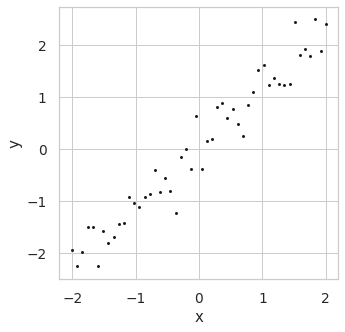

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
plt.plot(x_N, y_N, 'k.');
plt.xlabel('x');
plt.ylabel('y');

# Part 1: Gradient Descent for 1-dim. Linear Regression

## Define model

Consider the *simplest* linear regression model. A single weight parameter $w \in \mathbb{R}$ representing the slope of the prediction line. No bias/intercept.

To make predictions, we just compute the weight multiplied by the input feature
$$
\hat{y}(x) = w \cdot x
$$

## Define loss function

We want to minimize the total *squared error* across all N observed data examples (input features $x_n$, output responses $y_n$)

\begin{align}
    \min_{w \in \mathbb{R}} ~~ &\ell(w)
    \\
    \text{calc_loss}(w) = \ell(w) &= \sum_{n=1}^N (y_n - w x_n)^2
\end{align}

### Exercise 1A: Complete the code below

You should make it match the math expression above.

In [ ]:
def calc_loss(w):
    ''' Compute loss for slope-only least-squares linear regression
    
    Args
    ----
    w : float
        Value of slope parameter

    Returns
    -------
    loss : float
        Sum of squared error loss at provided w value
    '''
    y = y_N
    yhat_N = w * x_N
    sum_squared_error = np.sum(np.square(y-yhat_N)) # todo compute the sum of squared error between y and yhat
    return sum_squared_error

# Define the gradient function

\begin{align}
\text{calc_grad}(w) = \ell'(w) &= \frac{\partial}{\partial w} [ \sum_{n=1}^N (y_n - w x_n)^2] 
\\
&= \sum_{n=1}^N 2 (y_n - w x_n) (-x_n)
\\
&= 2 \sum_{n=1}^N (w x_n - y_n) (x_n)
\\
&= 2  w \left( \sum_{n=1}^N x_n^2 \right) - 2 \sum_{n=1}^N y_n x_n
\end{align}

Below, we've implemented the gradient calculation in code for you

In [ ]:
def calc_grad(w):
    ''' Compute gradient for slope-only least-squares linear regression
    
    Args
    ----
    w : float
        Value of slope parameter

    Returns
    -------
    g : float
        Value of derivative of loss function at provided w value
    '''
    g = 2.0 * w * np.sum(np.square(x_N)) - 2.0 * np.sum(x_N * y_N)
    return g

## Plot loss evaluated at each w from -3 to 8

We should see a "bowl" shape with one *global* minima, because our optimization problem is "convex"

In [ ]:
w_grid = np.linspace(-3, 8, 300) # create array of 300 values between -3 and 8

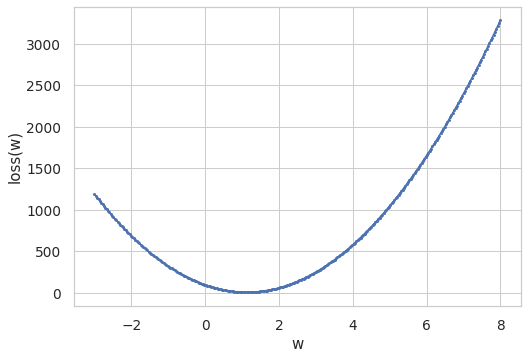

In [ ]:
loss_grid = np.asarray([calc_loss(w) for w in w_grid])
plt.plot(w_grid, loss_grid, 'b.-');
plt.xlabel('w');
plt.ylabel('loss(w)');

Discussion 1b: Visually, at what value of $w$ does the loss function have a minima? Is it near where you would expect (hint: look above for the "true" slope value used to generate the data)


-->ANSWER: the loss function will have a minima at w between 0 and 2

### Exercise 1c: Write NumPy code to identify which entry in the w_grid array corresponds to the lowest entry in the loss_grid array

Hint: use np.argmin

In [ ]:
r = np.argmin(loss_grid)
print('The correspond value is : {}'.format(w_grid[r]))

The correspond value is : 1.120401337792643


## Sanity check: plot gradient evaluated at each w from -3 to 8

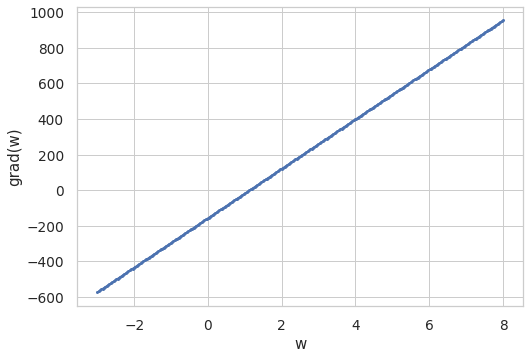

In [ ]:
grad_grid = np.asarray([calc_grad(w) for w in w_grid])
plt.plot(w_grid, grad_grid, 'b.-');
plt.xlabel('w');
plt.ylabel('grad(w)');

### Discussion 1d: Visually, at what value of $w$ does the gradient function cross zero? Is it the same place as the location of the minimum in the loss above?

Answer:  1.1204
 yes, it is nearly the same value 

TODO interpret the graph above and write your answer here, then discuss with your group


### Exercise 1d: Numerically, at which value of w does grad_grid cross zero?

We might try to estimate numerically where the gradient crosses zero.

We could do this in a few steps:

1) Compute the distance from each gradient in `grad_grid` to 0.0 (we could use just absolute distance)

2) Find the index of `grad_grid` with smallest distance (using `np.argmin`)

3) Plug that index into `w_grid` to get the $w$ value corresponding to that zero-crossing

In [ ]:
dist_from_zero_G = np.abs(grad_grid - 0.0)

zero_cross_index = np.argmin(dist_from_zero_G)

print("Zero crossing occurs at w = %.4f" % w_grid[zero_cross_index]) # TODO fix me for step 3 above

Zero crossing occurs at w = 1.1204


## Part 2: Gradient Descent (GD) as an algorithm in Python


### Define minimize_via_grad_descent algorithm

Can you understand what each step of this algorithm does?

In [ ]:
def minimize_via_grad_descent(calc_loss, calc_grad, init_w=0.0, step_size=0.001, max_iters=100):
    ''' Perform minimization of provided loss function via gradient descent
    
    Args
    ----
    calc_loss : function
    calc_grad : function
    init_w : float
    step_size : float
    max_iters : positive int
    
    Return
    ----
    wopt: float
        array of optimized weights that approximately gives the least error
    info_dict : dict
        Contains information about the optimization procedure useful for debugging
        Entries include:
        * trace_loss_list : list of loss values
        * trace_grad_list : list of gradient values
    '''
    w = 1.0 * init_w 
    grad = calc_grad(w)

    # Create some lists to track progress over time (for debugging)
    trace_loss_list = []
    trace_w_list = []
    trace_grad_list = []

    for iter_id in range(max_iters):
        if iter_id > 0:
            w = w - step_size * grad
        
        loss = calc_loss(w)
        grad = calc_grad(w)    

        print("  iter %5d/%d | w  % 13.5f | loss % 13.4f | grad % 13.4f" % (
            iter_id, max_iters, w, loss, grad))
    
        trace_loss_list.append(loss)
        trace_w_list.append(w)
        trace_grad_list.append(grad)
    
    wopt = w
    info_dict = dict(
        trace_loss_list=trace_loss_list,
        trace_w_list=trace_w_list, 
        trace_grad_list=trace_grad_list)
    
    return wopt, info_dict

### Discussion 2a: Which line of the above function does the *parameter update* happen?
Answer: for iter_id in range(max_iters):
        if iter_id > 0:
            w = w - step_size * grad

TODO write down here which line above *you* think it is, then discuss with your group

In [ ]:
# w = w - step_size * grad

### Try it! Run GD with step_size = 0.001

Running the cell below will have the following effects:

1) one line will be printed for every iteration, indicating the current w value and its associated loss

2) the "optimal" value of w will be stored in the variable named `wopt` returned by this function

3) a dictionary of information useful for debugging will be stored in the `info_dict` returned by this function

In [ ]:
wopt, info_dict = minimize_via_grad_descent(calc_loss, calc_grad, step_size=0.001);

  iter     0/100 | w        0.00000 | loss       93.3197 | grad     -156.5566
  iter     1/100 | w        0.15656 | loss       70.5104 | grad     -134.8304
  iter     2/100 | w        0.29139 | loss       53.5926 | grad     -116.1192
  iter     3/100 | w        0.40751 | loss       41.0446 | grad     -100.0047
  iter     4/100 | w        0.50751 | loss       31.7376 | grad      -86.1265
  iter     5/100 | w        0.59364 | loss       24.8345 | grad      -74.1743
  iter     6/100 | w        0.66781 | loss       19.7144 | grad      -63.8807
  iter     7/100 | w        0.73169 | loss       15.9168 | grad      -55.0156
  iter     8/100 | w        0.78671 | loss       13.1001 | grad      -47.3808
  iter     9/100 | w        0.83409 | loss       11.0110 | grad      -40.8055
  iter    10/100 | w        0.87489 | loss        9.4614 | grad      -35.1427
  iter    11/100 | w        0.91004 | loss        8.3121 | grad      -30.2657
  iter    12/100 | w        0.94030 | loss        7.4597 | grad 

### Discussion 2b: Does it appear from the *loss* values in trace above that the GD procedure converged?
Answer: yes it converged

### Discussion 2c: Does it appear from the *parameter* values in trace above that the GD procedure converged?
Answer: yes it coverged (by comparing the loss at 1st iteration and last iteration)


### Exercise 2d: What exactly is the gradient of the returned "optimal" value of w?

Use your `calc_grad` function to check the result. What is the gradient of the returned `wopt`?

Does this look totally converged? Can you find a $w$ value that would be even better?

In [ ]:
# TODO call calc_grad on the return value from above
r = calc_grad(wopt)
print(f"Gradient Value: {r}")

Gradient Value: -5.9046213692681704e-05


## Part 3: Diagnostic plots for gradient descent

Let's look at some trace functions.

Whenever you run gradient descent, an *excellent* debugging strategy is the ability to plot the loss, the gradient magnitude, and the parameter of interest at every step of the algorithm.

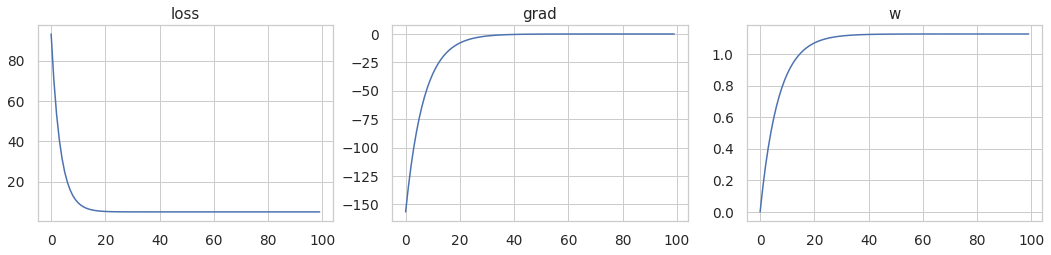

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False, figsize=(18,3.6))

axes[0].plot(info_dict['trace_loss_list']);
axes[0].set_title('loss');
axes[1].plot(info_dict['trace_grad_list']);
axes[1].set_title('grad');
axes[2].plot(info_dict['trace_w_list']);
axes[2].set_title('w');


### Discussion 3a: What value do we expect the *loss* to converge to? Should it always be zero?
Answer: the value should be minimized as much as possible.
It cannot or rarely be a value of 0 because that means that the model is overfitted.


### Discussion 3b: What value do we expect the *gradient* to converge to? Should it always be zero?
Answer: it doesn't have to be zero but the closer it gets to zero the better it is

# Part 4: Larger step sizes

## Try with larger step_size = 0.014

In [ ]:
wopt, info_dict = minimize_via_grad_descent(calc_loss, calc_grad, step_size=0.014);

NameError: ignored

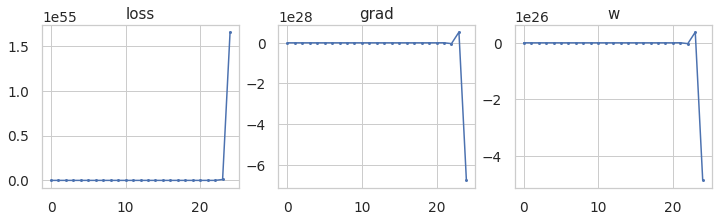

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False, figsize=(12,3))

axes[0].plot(info_dict['trace_loss_list'], '.-');
axes[0].set_title('loss');
axes[1].plot(info_dict['trace_grad_list'], '.-');
axes[1].set_title('grad');
axes[2].plot(info_dict['trace_w_list'], '.-');
axes[2].set_title('w');

### Discussion 4a: What happens here? How is this step size different than in Part 3 above?

###Answer: when the step size increases the values of the grad function and the loss function will not converge

TODO discuss with your group

## Try with even larger step size 0.1

In [ ]:
wopt, info_dict = minimize_via_grad_descent(calc_loss, calc_grad, step_size=0.1, max_iters=25);

  iter     0/25 | w        0.00000 | loss       93.3197 | grad     -156.5566
  iter     1/25 | w       15.65566 | loss    14649.2368 | grad     2016.0654
  iter     2/25 | w     -185.95088 | loss  2428476.1808 | grad   -25961.9847
  iter     3/25 | w     2410.24759 | loss  402716585.2503 | grad   334326.7829
  iter     4/25 | w   -31022.43070 | loss  66783022205.9171 | grad -4305310.2046
  iter     5/25 | w   399508.58976 | loss  11074716744084.4141 | grad  55441851.8184
  iter     6/25 | w  -5144676.59208 | loss  1836534899433323.2500 | grad -713955275.4570
  iter     7/25 | w   66250850.95363 | loss  304555007119229056.0000 | grad  9193995485.9874
  iter     8/25 | w  -853148697.64512 | loss  50504758929445773312.0000 | grad -118396145952.2056
  iter     9/25 | w   10986465897.57544 | loss  8375270853855496110080.0000 | grad  1524652410119.2183
  iter    10/25 | w  -141478775114.34641 | loss  1388882223424388487708672.0000 | grad -19633789199698.5000
  iter    11/25 | w   18219001448

### Discussion 3b: What happens here with this even larger step size? Is it converging?
###Answer: no conversion happens


### Exercise 3c: What is the largest step size you can get to converge reasonably?

In [ ]:
# TODO try some other step sizes here
wopt, info_dict = minimize_via_grad_descent(calc_loss, calc_grad, step_size=0.01) # TODO fix step_size

  iter     0/100 | w        0.00000 | loss       93.3197 | grad     -156.5566
  iter     1/100 | w        1.56557 | loss       18.2892 | grad       60.7056
  iter     2/100 | w        0.95851 | loss        7.0081 | grad      -23.5389
  iter     3/100 | w        1.19390 | loss        5.3119 | grad        9.1273
  iter     4/100 | w        1.10263 | loss        5.0569 | grad       -3.5392
  iter     5/100 | w        1.13802 | loss        5.0185 | grad        1.3723
  iter     6/100 | w        1.12429 | loss        5.0128 | grad       -0.5321
  iter     7/100 | w        1.12962 | loss        5.0119 | grad        0.2063
  iter     8/100 | w        1.12755 | loss        5.0118 | grad       -0.0800
  iter     9/100 | w        1.12835 | loss        5.0118 | grad        0.0310
  iter    10/100 | w        1.12804 | loss        5.0118 | grad       -0.0120
  iter    11/100 | w        1.12816 | loss        5.0118 | grad        0.0047
  iter    12/100 | w        1.12812 | loss        5.0118 | grad 

# Part 5: Sensitivity to initial conditions



### Exercise 5a: Try to call the defined procedure with a different initial condition for $w$. What happens?

You could try $w = 5.0$ or something else.

In [ ]:
# TODO try some other initial condition for init_w
wopt2, info_dict2 = minimize_via_grad_descent(calc_loss, calc_grad, init_w=0, step_size=0.003, max_iters=10) # TODO fix step_size

  iter     0/10 | w        0.00000 | loss       93.3197 | grad     -156.5566
  iter     1/10 | w        0.46967 | loss       35.0960 | grad      -91.3779
  iter     2/10 | w        0.74380 | loss       15.2607 | grad      -53.3349
  iter     3/10 | w        0.90381 | loss        8.5033 | grad      -31.1301
  iter     4/10 | w        0.99720 | loss        6.2012 | grad      -18.1698
  iter     5/10 | w        1.05171 | loss        5.4170 | grad      -10.6053
  iter     6/10 | w        1.08352 | loss        5.1498 | grad       -6.1900
  iter     7/10 | w        1.10209 | loss        5.0588 | grad       -3.6129
  iter     8/10 | w        1.11293 | loss        5.0278 | grad       -2.1088
  iter     9/10 | w        1.11926 | loss        5.0172 | grad       -1.2308


### Exercise 5b: Try again with another initial value. 

In [ ]:
# TODO try some other initial condition for init_w
wopt3, info_dict3 = minimize_via_grad_descent(calc_loss, calc_grad, init_w=0, step_size=0.003, max_iters=10) # TODO fix

  iter     0/10 | w        0.00000 | loss       93.3197 | grad     -156.5566
  iter     1/10 | w        0.46967 | loss       35.0960 | grad      -91.3779
  iter     2/10 | w        0.74380 | loss       15.2607 | grad      -53.3349
  iter     3/10 | w        0.90381 | loss        8.5033 | grad      -31.1301
  iter     4/10 | w        0.99720 | loss        6.2012 | grad      -18.1698
  iter     5/10 | w        1.05171 | loss        5.4170 | grad      -10.6053
  iter     6/10 | w        1.08352 | loss        5.1498 | grad       -6.1900
  iter     7/10 | w        1.10209 | loss        5.0588 | grad       -3.6129
  iter     8/10 | w        1.11293 | loss        5.0278 | grad       -2.1088
  iter     9/10 | w        1.11926 | loss        5.0172 | grad       -1.2308


### Exercise 5c: Make a trace plot

Make a trace plot showing convergence from multiple different starting values for $w$. What do you notice?

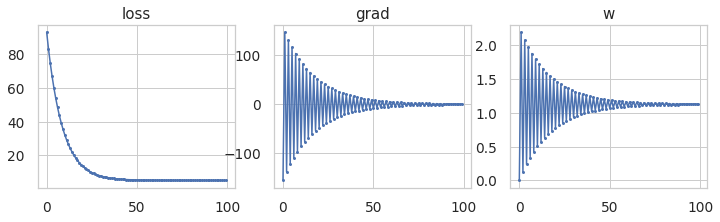

In [ ]:
# TODO
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False, figsize=(12,3))

axes[0].plot(info_dict['trace_loss_list'], '.-');
axes[0].set_title('loss');
axes[1].plot(info_dict['trace_grad_list'], '.-');
axes[1].set_title('grad');
axes[2].plot(info_dict['trace_w_list'], '.-');
axes[2].set_title('w');

# Part 6: Using scipy's built-in gradient optimization tools


In [ ]:
import scipy.optimize

Take a look at SciPy's built in minimization toolbox

<https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize>

We'll use "L-BFGS", a second-order method that uses the function and its gradient.

This is a "quasi-newton" method, which you can get an intuition for here:

https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization

In [ ]:
result = scipy.optimize.minimize(calc_loss, 0.0, jac=calc_grad, method='L-BFGS-B')

# Returns an object with several fields, let's print the result to get an idea
print(result)

      fun: 5.011759943825978
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.84217094e-14])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.12812831])


In [ ]:
print(str(result.message))

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL


In [ ]:
best_w = result.x
print(best_w)

[1.12812831]


In [ ]:
import numpy as np
x=[1, 2, 3, 4, 5]
w=[6, 7, 8, 9, 10]
f=0
for i in range(5):
  f=f+w[i]*x[i]
print(f)

130
